We explore populations/samples, variation of samples, confidence intervals, and hypothesis testing

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [5]:
data=pd.DataFrame()
data['Population']=[47,48,85,20,19,13,72,16,50,60]

In [6]:
smplWORepl=data['Population'].sample(5,replace=False)
smplWRepl=data['Population'].sample(5,replace=True)
#sample comes from PANDAS

In [7]:
print(smplWORepl)

1    48
8    50
3    20
0    47
7    16
Name: Population, dtype: int64


In [8]:
print(smplWRepl)

2    85
6    72
2    85
7    16
8    50
Name: Population, dtype: int64


In [6]:
print(data['Population'].mean())

43.0


In [13]:
#remember, the sample variance gets divided by n-1 (Bessel's correction), we can impliment this using ddof
print(smplWRepl.var(ddof=1))

854.3


In [14]:
print(smplWRepl.var(ddof=0))

683.4399999999999


We further explore variance

In [9]:
FastSample=pd.DataFrame(np.random.normal(10,5,size=30))
print('sample mean is', FastSample[0].mean())
print('sample SD is', FastSample[0].std(ddof=1))


sample mean is 9.603007478190905
sample SD is 5.836726788655038


In [15]:
meanlist=[]
varlist=[]
for i in range(1000):
    sample=pd.DataFrame(np.random.normal(10,5,size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

In [16]:
collection=pd.DataFrame()
collection['meanlist']=meanlist
collection['varlist']=varlist

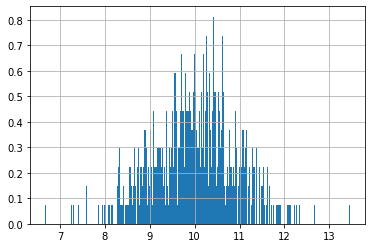

In [17]:
collection['meanlist'].hist(bins=500, density=1)

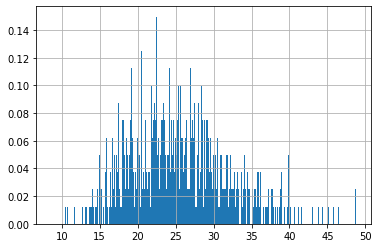

In [18]:
collection['varlist'].hist(bins=500, density=1)

Notice the variance is skewed lift: sample mean will have smaller variance than population.

Confidence intervals:

We standardize our distribution:
\begin{equation}
        Z=\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}}
\end{equation}

In [44]:
counter=0
for i in range(1000):
    zleft=norm.ppf(.1)
    zright=norm.ppf(.9)
    #this gives 80% confidence interval
    FastSample2=pd.DataFrame(np.random.normal(10,5,size=30))
    sample_mean=FastSample2[0].mean()
    sample_std=FastSample2[0].std(ddof=1)/(FastSample2.shape[0]**.5)
    intervalLeft=sample_mean+zleft*sample_std
    intervalRight=sample_mean+zright*sample_std
    if intervalLeft < 10 and intervalRight > 10:
        counter+=1
print(counter)        



796


80% confidence interval means: 80% of the time, the true mean will fall in this interval


In [4]:
FastSample2[0]

0     14.804057
1      9.894308
2     10.758791
3     15.458050
4     10.477260
5      4.780669
6     16.328523
7     18.213643
8     11.931268
9     12.047321
10    14.904894
11    12.390632
12     9.511644
13    16.414569
14    10.696797
15     2.626725
16     2.343628
17    12.857644
18     5.239689
19    13.163631
20    13.110792
21    10.942706
22    13.901008
23    15.979881
24    13.118509
25     1.635518
26     8.665966
27     7.244393
28    16.782525
29    14.497332
Name: 0, dtype: float64

Hypothesis testing: